In [19]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.utils.data as data
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Autorzy:
Filip Misztal
Jakub Grądziel

In [20]:
torch.cpu.is_available()
device = torch.device('cpu')
device

device(type='cpu')

In [21]:
train_data = pd.read_csv('train_data.csv', index_col=None)
train_data

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,N_elevators,SubwayStation,N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111.0,184.0,5min~10min,10min~15min,3.0,0.0,Kyungbuk_uni_hospital,5,6.0,9.0
1,51327,1985,587,8,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
2,48672,1985,587,6,corridor,individual_heating,self_management,80.0,76.0,0~5min,5min~10min,2.0,2.0,Daegu,3,12.0,4.0
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249.0,536.0,0~5min,0-5min,5.0,11.0,Sin-nam,5,3.0,7.0
4,78318,1992,644,2,mixed,individual_heating,self_management,142.0,79.0,5min~10min,15min~20min,4.0,8.0,Myung-duk,3,9.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4119,570796,2007,1928,24,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4120,307079,2015,644,22,terraced,individual_heating,management_in_trust,102.0,400.0,0~5min,5min~10min,5.0,10.0,Daegu,7,7.0,11.0
4121,357522,2007,868,20,terraced,individual_heating,management_in_trust,0.0,1270.0,0~5min,0-5min,14.0,16.0,Kyungbuk_uni_hospital,10,9.0,10.0
4122,312389,1978,1327,1,corridor,individual_heating,self_management,87.0,0.0,0~5min,0-5min,1.0,4.0,Kyungbuk_uni_hospital,3,7.0,11.0


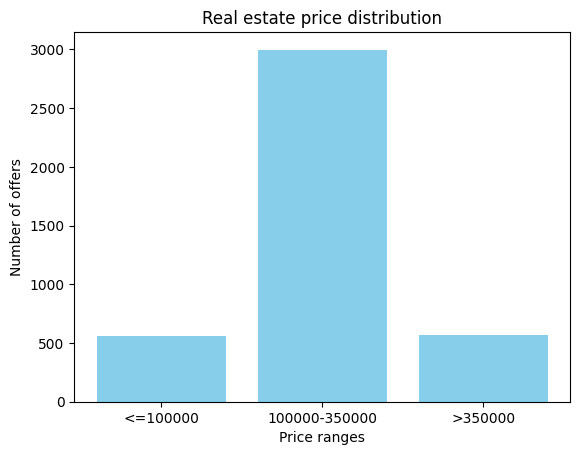

In [22]:
ranges = [0, 100000, 350000, np.inf]
hist, _ = np.histogram(train_data['SalePrice'], bins=ranges)
plt.bar(['<=100000', '100000-350000', '>350000'], hist, color='skyblue')
plt.xlabel('Price ranges')
plt.ylabel('Number of offers')
plt.title('Real estate price distribution')
plt.show()

In [23]:
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = pd.DataFrame(X_train)
X_valid = pd.DataFrame(X_valid)

In [24]:
columns_to_one_hot_encode = ['SubwayStation', 'HallwayType']
X_train = pd.get_dummies(X_train, columns=columns_to_one_hot_encode)

label_encoder = LabelEncoder()
X_train['HeatingType'] = label_encoder.fit_transform(X_train['HeatingType'])
X_train['AptManageType'] = label_encoder.fit_transform(X_train['AptManageType'])

time_to_bus_stop_categories = ['0~5min', '5min~10min', '10min~15min']
time_to_subway_categories = ['0-5min', '5min~10min', '10min~15min', '15min~20min', 'no_bus_stop_nearby']
ordinal_encoder_bus_stop = OrdinalEncoder(categories=[time_to_bus_stop_categories])
ordinal_encoder_subway = OrdinalEncoder(categories=[time_to_subway_categories])
X_train['TimeToBusStop'] = ordinal_encoder_bus_stop.fit_transform(X_train[['TimeToBusStop']])
X_train['TimeToSubway'] = ordinal_encoder_subway.fit_transform(X_train[['TimeToSubway']])

columns_to_minMax_scaler = ['YearBuilt', 'Size(sqf)', 'N_manager', 'N_elevators', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']
minMaxScaler = MinMaxScaler()
X_train[columns_to_minMax_scaler] = minMaxScaler.fit_transform(X_train[columns_to_minMax_scaler])

columns_to_standard_scaler = ['Floor', 'N_Parkinglot(Ground)', 'N_Parkinglot(Basement)']
standardScaler = StandardScaler()
X_train[columns_to_standard_scaler] = standardScaler.fit_transform(X_train[columns_to_standard_scaler])

X_train = X_train.astype(float)
X_train

,YearBuilt,Size(sqf),Floor,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,...,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced
3162,0.405405,0.353769,-0.403018,1.0,0.0,1.564091,-0.098313,0.0,3.0,0.538462,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2514,0.783784,0.332879,1.561456,1.0,0.0,-0.892275,1.706125,0.0,0.0,1.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1894,0.756757,0.460490,0.775666,1.0,0.0,0.277200,-0.098313,0.0,0.0,0.307692,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3612,0.729730,0.353769,-0.010123,1.0,0.0,-0.577597,0.545778,0.0,1.0,0.384615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3349,0.945946,0.231153,-1.188807,1.0,0.0,-0.854701,0.870282,0.0,0.0,0.384615,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0.972973,0.353769,1.037596,1.0,0.0,-0.469573,1.470122,0.0,0.0,0.461538,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
466,0.756757,0.353769,0.775666,1.0,0.0,0.277200,-0.098313,0.0,0.0,0.307692,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3092,0.783784,0.353769,2.216280,1.0,0.0,1.709688,-0.127813,0.0,0.0,0.307692,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3772,1.000000,0.353769,-0.533983,1.0,0.0,-0.070355,1.831501,1.0,1.0,0.538462,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
def encode(features):
    features = pd.get_dummies(features, columns=columns_to_one_hot_encode)

    features['HeatingType'] = features['HeatingType'].map({'individual_heating': 0, 'central_heating': 1})
    features['AptManageType'] = features['AptManageType'].map({'management_in_trust': 0, 'self_management': 1})
    
    features['TimeToBusStop'] = ordinal_encoder_bus_stop.transform(features[['TimeToBusStop']])
    features['TimeToSubway'] = ordinal_encoder_subway.transform(features[['TimeToSubway']])
    
    features[columns_to_minMax_scaler] = minMaxScaler.transform(features[columns_to_minMax_scaler])
    features[columns_to_standard_scaler] = standardScaler.transform(features[columns_to_standard_scaler])
    
    features = features.astype(float)
    return features

In [26]:
X_valid = encode(X_valid)

In [27]:
train_dataset = data.TensorDataset(torch.from_numpy(X_train.values).float(),torch.from_numpy(y_train.values.astype(float)).float())
train_data_loader = data.DataLoader(train_dataset, batch_size=256, shuffle=True)

val_dataset = data.TensorDataset(torch.from_numpy(X_valid.values).float(),torch.from_numpy(y_valid.values.astype(float)).float())
val_data_loader = data.DataLoader(val_dataset, batch_size=128, shuffle=True)

In [28]:
class Classifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs=1):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden*3)
        self.act_fn1 = nn.ReLU()
        self.do1 = nn.Dropout(0.25)
        self.linear2 = nn.Linear(num_hidden*3, num_hidden*2)
        self.act_fn2 = nn.ReLU()
        self.do2 = nn.Dropout(0.25)
        self.linear3 = nn.Linear(num_hidden*2, num_hidden)
        self.act_fn3 = nn.ReLU()
        self.do3 = nn.Dropout(0.25)
        self.linear4 = nn.Linear(num_hidden, num_outputs)
        self.act_fn4 = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.act_fn1(x)
        x = self.do1(x)
        x = self.linear2(x)
        x = self.act_fn2(x)
        x = self.do2(x)
        x = self.linear3(x)
        x = self.act_fn3(x)
        x = self.do3(x)
        x = self.linear4(x)
        x = self.act_fn4(x)
        return x

In [29]:
model = Classifier(num_inputs=X_train.shape[1], num_hidden=60).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay=1e-5, amsgrad=True)
loss_module = nn.MSELoss()
model

Classifier(
  (linear1): Linear(in_features=25, out_features=180, bias=True)
  (act_fn1): ReLU()
  (do1): Dropout(p=0.25, inplace=False)
  (linear2): Linear(in_features=180, out_features=120, bias=True)
  (act_fn2): ReLU()
  (do2): Dropout(p=0.25, inplace=False)
  (linear3): Linear(in_features=120, out_features=60, bias=True)
  (act_fn3): ReLU()
  (do3): Dropout(p=0.25, inplace=False)
  (linear4): Linear(in_features=60, out_features=1, bias=True)
  (act_fn4): ReLU()
)

In [30]:
def rmsle(y_true, y_pred):
    y_true_log = np.log1p(y_true)
    y_pred_log = np.log1p(y_pred)
    squared_errors = (y_true_log - y_pred_log) ** 2
    rmsle = np.sqrt(np.mean(squared_errors))
    return rmsle

Epoch 1/500:
Training Loss: 64981880832.0000
Validation Loss: 58212450304.0000
Validation RMSLE: 11.2231
-------------------------
Epoch 2/500:
Training Loss: 56997888000.0000
Validation Loss: 58209157120.0000
Validation RMSLE: 9.8693
-------------------------
Epoch 3/500:
Training Loss: 58908426240.0000
Validation Loss: 58196869120.0000
Validation RMSLE: 8.5489
-------------------------
Epoch 4/500:
Training Loss: 60536754176.0000
Validation Loss: 58159595520.0000
Validation RMSLE: 7.3819
-------------------------
Epoch 5/500:
Training Loss: 54418096128.0000
Validation Loss: 58064642048.0000
Validation RMSLE: 6.3728
-------------------------
Epoch 6/500:
Training Loss: 56808898560.0000
Validation Loss: 57856286720.0000
Validation RMSLE: 5.5032
-------------------------
Epoch 7/500:
Training Loss: 62341890048.0000
Validation Loss: 57457946624.0000
Validation RMSLE: 4.7584
-------------------------
Epoch 8/500:
Training Loss: 56761999360.0000
Validation Loss: 56762716160.0000
Validation

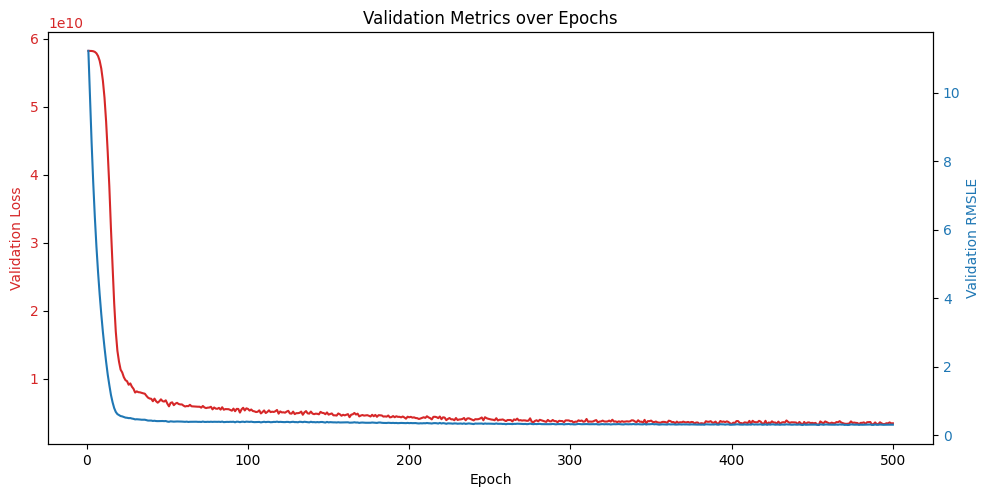

In [31]:
validation_loss_list = []
validation_rmsle_list = []
model.train()
for epoch in range(500):
    preds_list = []
    targets_list = []
    for data_inputs, data_labels in train_data_loader:
        data_inputs = data_inputs.to(device)
        data_labels = data_labels.to(device)

        preds = model(data_inputs)
        preds = preds.squeeze(dim=1)

        loss = loss_module(preds, data_labels.float())

        preds_list.extend(preds.cpu().detach().numpy())
        targets_list.extend(data_labels.cpu().detach().numpy())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    validation_preds_list = []
    validation_targets_list = []
    with torch.no_grad():
        for val_inputs, val_labels in val_data_loader:
            val_inputs = val_inputs.to(device)
            val_labels = val_labels.to(device)
            val_preds = model(val_inputs)
            val_preds = val_preds.squeeze(dim=1)
            validation_preds_list.extend(val_preds.cpu().detach().numpy())
            validation_targets_list.extend(val_labels.cpu().detach().numpy())

    val_loss = loss_module(torch.tensor(validation_preds_list), torch.tensor(validation_targets_list).float())
    val_rmsle = rmsle(np.array(validation_targets_list), np.array(validation_preds_list))

    validation_loss_list.append(val_loss)
    validation_rmsle_list.append(val_rmsle)

    print(f"Epoch {epoch + 1}/{500}:")
    print(f"Training Loss: {loss:.4f}")
    print(f"Validation Loss: {val_loss:.4f}")
    print(f"Validation RMSLE: {val_rmsle:.4f}")
    print("-------------------------")

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Validation Loss', color=color)
ax1.plot(range(1, len(validation_loss_list) + 1), validation_loss_list, label='Validation Loss', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Validation RMSLE', color=color)
ax2.plot(range(1, len(validation_rmsle_list) + 1), validation_rmsle_list, label='Validation RMSLE', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Validation Metrics over Epochs')
plt.show()

In [32]:
model.eval()
val_tensor = torch.from_numpy(X_valid.values.astype(float)).to(device).float()
val_pred = model(val_tensor).cpu().detach().numpy()
val_res = np.where(val_pred < 100000, 0, np.where((val_pred >= 100000) & (val_pred <350000 ), 1, 2))
val_y_cat = np.where(y_valid < 100000, 0, np.where((y_valid >= 100000) & (y_valid <350000 ), 1, 2))
accuracy = accuracy_score(val_y_cat, val_res)
print("Accuracy:", accuracy)

Accuracy: 0.8351515151515152


In [33]:
# f1 score
f1_all = f1_score(y_true=val_y_cat, y_pred=val_res, average=None)
f1_weighted = f1_score(y_true=val_y_cat, y_pred=val_res, average="weighted")
print("Accuracy for cheap:     %s \naccuracy for average:   %s \naccuracy for expensive: %s"%(f1_all[0], f1_all[1], f1_all[2]))
print("Accuracy adjusted class imbalance: ", f1_weighted)

Accuracy for cheap:     0.6638297872340425 
accuracy for average:   0.8894308943089431 
accuracy for expensive: 0.6918918918918919
Accuracy adjusted class imbalance:  0.8302096248250893


In [34]:
X_combined = pd.concat([X_train, X_valid], axis=0)
y_combined = pd.concat([y_train, y_valid], axis=0)

combined_dataset = data.TensorDataset(torch.from_numpy(X_combined.values).float(), torch.from_numpy(y_combined.values.astype(float)).float())
combined_data_loader = data.DataLoader(combined_dataset, batch_size=256, shuffle=True)

# tworzenie finalnego modelu uczonego na wszystkich danych treningowych
model_final = Classifier(num_inputs=X_combined.shape[1], num_hidden=60).to(device)
optimizer = torch.optim.Adam(model_final.parameters(), lr = 0.001, weight_decay=1e-5, amsgrad=True)
loss_module = nn.MSELoss()

model_final.train()
for epoch in range(500):
    for data_inputs, data_labels in combined_data_loader:
        data_inputs = data_inputs.to(device)
        data_labels = data_labels.to(device)
        preds = model_final(data_inputs)
        preds = preds.squeeze(dim=1)
        loss = loss_module(preds, data_labels.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
model_final.eval()

Classifier(
  (linear1): Linear(in_features=25, out_features=180, bias=True)
  (act_fn1): ReLU()
  (do1): Dropout(p=0.25, inplace=False)
  (linear2): Linear(in_features=180, out_features=120, bias=True)
  (act_fn2): ReLU()
  (do2): Dropout(p=0.25, inplace=False)
  (linear3): Linear(in_features=120, out_features=60, bias=True)
  (act_fn3): ReLU()
  (do3): Dropout(p=0.25, inplace=False)
  (linear4): Linear(in_features=60, out_features=1, bias=True)
  (act_fn4): ReLU()
)

In [35]:
X_test = pd.read_csv('test_data.csv')
X_test = encode(X_test)
X_test

,YearBuilt,Size(sqf),Floor,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,TimeToSubway,N_manager,...,SubwayStation_Banwoldang,SubwayStation_Chil-sung-market,SubwayStation_Daegu,SubwayStation_Kyungbuk_uni_hospital,SubwayStation_Myung-duk,SubwayStation_Sin-nam,SubwayStation_no_subway_nearby,HallwayType_corridor,HallwayType_mixed,HallwayType_terraced
0,0.405405,0.353769,-0.272053,0.0,0.0,1.564091,-0.098313,0.0,3.0,0.538462,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.972973,0.350590,0.513736,0.0,0.0,-0.469573,1.470122,0.0,0.0,0.461538,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.783784,0.678474,-0.664948,0.0,0.0,-0.859398,0.071314,0.0,0.0,0.307692,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.729730,0.276113,1.168561,0.0,0.0,-0.577597,0.545778,0.0,1.0,0.384615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.756757,0.348774,-0.664948,0.0,0.0,-0.314582,-0.971031,1.0,0.0,0.153846,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,0.756757,0.872389,-1.319772,0.0,0.0,0.277200,-0.098313,0.0,0.0,0.307692,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1763,0.783784,0.571753,-0.664948,0.0,0.0,1.709688,-0.127813,0.0,0.0,0.307692,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1764,0.405405,0.231153,1.037596,0.0,0.0,1.564091,-0.098313,0.0,3.0,0.538462,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1765,0.810811,0.353769,-0.141088,0.0,0.0,0.032972,-0.248273,1.0,0.0,0.384615,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
test_tensor = torch.from_numpy(X_test.values.astype(float)).to(device).float()

In [37]:
final_pred = model_final(test_tensor).cpu().detach().numpy()
final_pred

array([[145484.42],
       [310723.8 ],
       [387416.56],
       ...,
       [121741.32],
       [237047.64],
       [144693.1 ]], dtype=float32)

In [38]:
final_res = np.where(final_pred < 100000, 0, np.where((final_pred >= 100000) & (final_pred <350000 ), 1, 2))
final_res

array([[1],
       [1],
       [2],
       ...,
       [1],
       [1],
       [1]])

In [39]:
pd.DataFrame(final_res).to_csv("grądziel_misztal.csv", header=False, index=False)